In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    run_on_colab = True
else:
    print('Not running on CoLab')
    run_on_colab = False
if run_on_colab:
    from google.colab import drive
    drive.mount('/drive', force_remount=True)
    

Running on CoLab
Mounted at /drive
time: 1.17 s (started: 2021-06-11 16:26:35 +00:00)


In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.47 s (started: 2021-06-11 16:26:38 +00:00)


In [ ]:
rocs_count = 1
timeframe = "minute"
timeframe_minutes = 1
binary = True

time: 4.56 ms (started: 2021-06-11 16:26:41 +00:00)


In [ ]:
!pip install pandas_ta
import math
import pandas as pd
import numpy as np
import pandas_ta as ta
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

time: 3.47 s (started: 2021-06-11 16:26:41 +00:00)


In [ ]:
if run_on_colab:
    data_path = "/drive/My Drive/disertation/BTC-USDT.csv"

time: 1.71 ms (started: 2021-06-11 16:26:45 +00:00)


In [ ]:
df = pd.read_csv(data_path)
df["open_time"] = df["open_time"].apply(lambda x: x if x % 60000 == 0 else (x//60000 + 1) * 60000)

time: 5.56 s (started: 2021-06-11 16:26:45 +00:00)


In [ ]:
df["open_time"] = df["open_time"]//1000
df.set_index(df["open_time"].astype('datetime64[s]'), inplace=True)
df.drop(["open_time", "quote_asset_volume", "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "close_time", "ignore"], axis=1, inplace=True)
df

,open,high,low,close,volume
open_time,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796
...,...,...,...,...,...
2021-06-02 23:05:00,37506.97,37528.07,37488.15,37524.58,18.983526
2021-06-02 23:06:00,37524.59,37560.36,37524.59,37560.04,15.443724
2021-06-02 23:07:00,37560.04,37562.97,37516.67,37518.13,18.013743


time: 297 ms (started: 2021-06-11 16:26:51 +00:00)


In [ ]:
from datetime import timedelta
idx_to_add = []
for i in range(len(df)-1):
    if df.index[i] + timedelta(minutes=1) == df.index[i+1]:
        continue
    else:
        new_idx = df.index[i] + timedelta(minutes=1)
        next_idx = df.index[i+1]
        while new_idx != next_idx:
            idx_to_add.append(new_idx)
            new_idx += timedelta(minutes=1)
        print(df.index[i+1] - df.index[i])
        print(i)
        print(df.index[i], df.index[i+1])
print("Need to add {} new indexes.".format(len(idx_to_add)), idx_to_add[:5])

0 days 07:01:00
29519
2017-09-06 15:59:00 2017-09-06 23:00:00
0 days 00:13:00
177061
2017-12-18 10:01:00 2017-12-18 10:14:00
0 days 01:05:00
177197
2017-12-18 12:29:00 2017-12-18 13:34:00
0 days 02:06:00
201044
2018-01-04 03:00:00 2018-01-04 05:06:00
1 days 09:32:00
251167
2018-02-08 00:28:00 2018-02-09 10:00:00
0 days 00:15:00
252368
2018-02-10 06:00:00 2018-02-10 06:15:00
0 days 00:35:00
253674
2018-02-11 04:00:00 2018-02-11 04:35:00
0 days 10:01:00
447919
2018-06-26 01:59:00 2018-06-26 12:00:00
0 days 01:46:00
449419
2018-06-27 12:59:00 2018-06-27 14:45:00
0 days 07:38:00
458637
2018-07-04 00:22:00 2018-07-04 08:00:00
0 days 03:31:00
612597
2018-10-19 05:59:00 2018-10-19 09:30:00
0 days 07:01:00
649587
2018-11-14 01:59:00 2018-11-14 09:00:00
0 days 06:01:00
819087
2019-03-12 01:59:00 2019-03-12 08:00:00
0 days 10:01:00
910947
2019-05-15 02:59:00 2019-05-15 13:00:00
0 days 01:02:00
944561
2019-06-07 21:13:00 2019-06-07 22:15:00
0 days 08:01:00
1042706
2019-08-15 01:59:00 2019-08-15 1

In [ ]:
df_ = pd.DataFrame(index=idx_to_add, columns=df.columns)
df_

,open,high,low,close,volume
2017-09-06 16:00:00,NaN,NaN,NaN,NaN,NaN
2017-09-06 16:01:00,NaN,NaN,NaN,NaN,NaN
2017-09-06 16:02:00,NaN,NaN,NaN,NaN,NaN
2017-09-06 16:03:00,NaN,NaN,NaN,NaN,NaN
2017-09-06 16:04:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-04-25 08:40:00,NaN,NaN,NaN,NaN,NaN
2021-04-25 08:41:00,NaN,NaN,NaN,NaN,NaN
2021-04-25 08:42:00,NaN,NaN,NaN,NaN,NaN
2021-04-25 08:43:00,NaN,NaN,NaN,NaN,NaN


time: 48 ms (started: 2021-06-11 16:27:50 +00:00)


In [ ]:
df = df.append(df_)
df.sort_index(ascending=True, inplace=True)
df

,open,high,low,close,volume
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796
...,...,...,...,...,...
2021-06-02 23:05:00,37506.97,37528.07,37488.15,37524.58,18.983526
2021-06-02 23:06:00,37524.59,37560.36,37524.59,37560.04,15.443724
2021-06-02 23:07:00,37560.04,37562.97,37516.67,37518.13,18.013743
2021-06-02 23:08:00,37519.99,37550.00,37517.97,37542.03,23.368370


time: 220 ms (started: 2021-06-11 16:27:50 +00:00)


In [ ]:
df.drop(df.tail(10).index,inplace=True)
df

,open,high,low,close,volume
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796
...,...,...,...,...,...
2021-06-02 22:55:00,37498.92,37528.99,37498.92,37514.96,25.141831
2021-06-02 22:56:00,37514.97,37537.65,37480.17,37492.88,22.632012
2021-06-02 22:57:00,37495.21,37550.02,37493.32,37549.99,11.721902
2021-06-02 22:58:00,37550.00,37550.00,37509.01,37536.07,25.642973


time: 596 ms (started: 2021-06-11 16:27:50 +00:00)


In [ ]:
df.interpolate(inplace=True)
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

time: 509 ms (started: 2021-06-11 16:27:50 +00:00)


In [ ]:
df.describe()

,open,high,low,close,volume
count,1.995540e+06,1.995540e+06,1.995540e+06,1.995540e+06,1.995540e+06
mean,1.285613e+04,1.286675e+04,1.284552e+04,1.285635e+04,3.474233e+01
std,1.316270e+04,1.317475e+04,1.315066e+04,1.316268e+04,5.782487e+01
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00
25%,6.511980e+03,6.515030e+03,6.508560e+03,6.511958e+03,9.196172e+00
50%,8.656750e+03,8.661670e+03,8.651255e+03,8.656740e+03,1.967743e+01
75%,1.122483e+04,1.123509e+04,1.121300e+04,1.122485e+04,3.922369e+01
max,6.480000e+04,6.485400e+04,6.468517e+04,6.480000e+04,3.564139e+03


time: 321 ms (started: 2021-06-11 16:27:51 +00:00)


In [ ]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

time: 33.4 ms (started: 2021-06-11 16:27:51 +00:00)


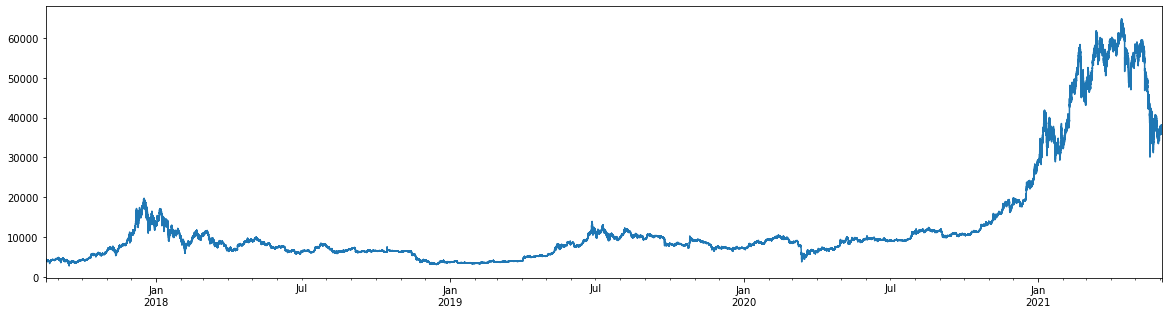

time: 8.93 s (started: 2021-06-11 16:27:51 +00:00)


In [ ]:
df["close"].plot()

In [ ]:
# help(df.ta)
# help(ta.bbands)

time: 1.13 ms (started: 2021-06-11 16:28:00 +00:00)


In [ ]:
def merge_minutes(mins):
    df_data = []
    for idx in range(0, len(df), mins):
        open_time = df.index[idx]
        open = df.iloc[idx]["open"]
        close = df.iloc[idx+mins-1]["close"]
        lowest = math.inf
        for low in df.iloc[idx:idx+mins]["low"]:
            if low < lowest:
                lowest = low
        highest = -math.inf
        for high in df.iloc[idx:idx+mins]["high"]:
            if high > highest:
                highest = high

        df_dict = {
            "open_time": open_time,
            "open": open,
            "low": lowest,
            "high": highest,
            "close": close
        }
        df_data.append(df_dict)
    
    new_df = pd.DataFrame(df_data)
    new_df.set_index("open_time", inplace=True)
    return new_df

time: 23.8 ms (started: 2021-06-11 16:28:00 +00:00)


In [ ]:
if timeframe != "minute":
    df = merge_minutes(timeframe_minutes)
df

,open,high,low,close,volume
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796
...,...,...,...,...,...
2021-06-02 22:55:00,37498.92,37528.99,37498.92,37514.96,25.141831
2021-06-02 22:56:00,37514.97,37537.65,37480.17,37492.88,22.632012
2021-06-02 22:57:00,37495.21,37550.02,37493.32,37549.99,11.721902
2021-06-02 22:58:00,37550.00,37550.00,37509.01,37536.07,25.642973


time: 38.3 ms (started: 2021-06-11 16:28:00 +00:00)


In [ ]:
pd.options.mode.use_inf_as_na = True

time: 1.85 ms (started: 2021-06-11 16:28:00 +00:00)


In [ ]:
df["sma5_diff"] = (df["close"] - df.ta.sma(length=5)) / df["close"]
df["sma8_diff"] = (df["close"] - df.ta.sma(length=8)) / df["close"]
df["sma13_diff"] = (df["close"] - df.ta.sma(length=13)) / df["close"]
df["sma21_diff"] = (df["close"] - df.ta.sma(length=21)) / df["close"]

df["ema5_diff"] = (df["close"] - df.ta.ema(length=5)) / df["close"]
df["ema8_diff"] = (df["close"] - df.ta.ema(length=8)) / df["close"]
df["ema13_diff"] = (df["close"] - df.ta.ema(length=13)) / df["close"]
df["ema21_diff"] = (df["close"] - df.ta.ema(length=21)) / df["close"]

df.ta.macd(append=True); # macd, macd-histogram, macd-signal, 0-centered

df.ta.rsi(append=True)

df.ta.roc(length=1, append=True)

df.ta.stoch(append=True) # STOCHk, STOCHd

df.ta.cci(append=True, fill_method="ffill");

df.ta.atr(append=True);

# df.ta.obv(append=True); # not using obv, it is a cumulative volume and not relevant in this context - if we use volume someother way

df.ta.willr(append=True);

df.ta.aroon(append=True);  # AROON_UP, AROON_DN, AROON_OSC,   AROON_OSC = AROON_UP - AROON_DN

df["dema10_diff"] = (df["close"] - df.ta.dema()) / df["close"]

bb = df.ta.bbands(); # BBL_5_2.0	BBM_5_2.0	BBU_5_2.0	BBB_5_2.0

df["BBB_5_2.0"] = bb["BBB_5_2.0"]
df["BBU_5_2.0_diff"] = (df["close"] - bb["BBU_5_2.0"]) / df["close"]
df["BBL_5_2.0_diff"] = (df["close"] - bb["BBL_5_2.0"]) / df["close"]
df["BBM_5_2.0_diff"] = (df["close"] - bb["BBM_5_2.0"]) / df["close"]

df.ta.rvi(append=True);

# df.ta.ad(append=True);  # not used, cumulative used for divergences

df

,open,high,low,close,volume,sma5_diff,sma8_diff,sma13_diff,sma21_diff,ema5_diff,ema8_diff,ema13_diff,ema21_diff,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,ROC_1,STOCHk_14_3_3,STOCHd_14_3_3,CCI_14_0.015,ATRr_14,WILLR_14,AROOND_14,AROONU_14,AROONOSC_14,dema10_diff,BBB_5_2.0,BBU_5_2.0_diff,BBL_5_2.0_diff,BBM_5_2.0_diff,RVI_14
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.447732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.445736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,-0.000895,NaN,NaN,NaN,-0.000895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800210,-0.004900,0.003109,-0.000895,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-02 22:55:00,37498.92,37528.99,37498.92,37514.96,25.141831,0.000551,0.000852,0.001286,0.001363,0.000561,0.000785,0.000864,0.000465,-29.903408,17.818883,-47.722291,49.983280,0.042775,93.338375,92.782482,142.919178,53.884182,-8.685155,7.142857,100.000000,92.857143,0.000661,0.148965,-0.000194,0.001295,0.000551,63.580643
2021-06-02 22:56:00,37514.97,37537.65,37480.17,37492.88,22.632012,-0.000077,0.000252,0.000525,0.000820,-0.000019,0.000153,0.000236,-0.000112,-26.830455,16.713469,-43.543924,47.272832,-0.058857,88.279795,92.322148,102.569537,54.141026,-26.475458,0.000000,100.000000,100.000000,0.000019,0.140590,-0.000780,0.000626,-0.000077,58.044194
2021-06-02 22:57:00,37495.21,37550.02,37493.32,37549.99,11.721902,0.001144,0.001477,0.001873,0.002349,0.001002,0.001302,0.001506,0.001281,-19.561328,19.186077,-38.747405,54.192022,0.152322,88.273445,89.963872,157.190046,54.355239,-0.019051,0.000000,100.000000,100.000000,0.001001,0.291973,-0.000314,0.002603,0.001144,62.093463
2021-06-02 22:58:00,37550.00,37550.00,37509.01,37536.07,25.642973,0.000466,0.000793,0.001260,0.001953,0.000421,0.000724,0.000973,0.000828,-14.753649,19.195005,-33.948654,52.387508,-0.037071,88.215553,88.256265,133.930805,53.400579,-8.858830,7.142857,92.857143,85.714286,0.000359,0.258558,-0.000826,0.001759,0.000466,55.349253


time: 2min 27s (started: 2021-06-11 16:28:00 +00:00)


In [ ]:
for roc_idx in range(rocs_count):
    df.ta.roc(length=roc_idx+1, append=True)

time: 114 ms (started: 2021-06-11 16:30:28 +00:00)


In [ ]:
df.describe()

,open,high,low,close,volume,sma5_diff,sma8_diff,sma13_diff,sma21_diff,ema5_diff,ema8_diff,ema13_diff,ema21_diff,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,ROC_1,STOCHk_14_3_3,STOCHd_14_3_3,CCI_14_0.015,ATRr_14,WILLR_14,AROOND_14,AROONU_14,AROONOSC_14,dema10_diff,BBB_5_2.0,BBU_5_2.0_diff,BBL_5_2.0_diff,BBM_5_2.0_diff,RVI_14
count,1.995540e+06,1.995540e+06,1.995540e+06,1.995540e+06,1.995540e+06,1.995536e+06,1.995533e+06,1.995528e+06,1.995520e+06,1.995536e+06,1.995533e+06,1.995528e+06,1.995520e+06,1.995515e+06,1.995507e+06,1.995507e+06,1.995526e+06,1.995539e+06,1.995525e+06,1.995523e+06,1.995527e+06,1.995527e+06,1.993827e+06,1.995526e+06,1.995526e+06,1.995526e+06,1.995531e+06,1.995536e+06,1.995536e+06,1.995536e+06,1.995536e+06,1.995523e+06
mean,1.285613e+04,1.286675e+04,1.284552e+04,1.285635e+04,3.474233e+01,2.128416e-07,5.292553e-07,1.165517e-06,2.279783e-06,2.690777e-07,6.058080e-07,1.247005e-06,2.369467e-06,1.166817e-01,-6.230314e-05,1.167376e-01,5.039901e+01,2.184192e-04,5.159196e+01,5.159196e+01,1.258848e+00,2.150014e+01,-4.836406e+01,4.637264e+01,4.790139e+01,1.528745e+00,-2.907413e-07,3.537530e-01,-1.768591e-03,1.769016e-03,2.128416e-07,5.039779e+01
std,1.316270e+04,1.317475e+04,1.315066e+04,1.316268e+04,5.782487e+01,1.524731e-03,2.011945e-03,2.606056e-03,3.329385e-03,1.236435e-03,1.676331e-03,2.212012e-03,2.853930e-03,2.806246e+01,8.755220e+00,2.629992e+01,1.124691e+01,1.479359e-01,2.738743e+01,2.648766e+01,1.171047e+02,3.414106e+01,2.984340e+01,3.643138e+01,3.667175e+01,6.294993e+01,1.262104e-03,4.432454e-01,2.715978e-03,2.664186e-03,1.524731e-03,1.355758e+01
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,-9.266036e-02,-1.284116e-01,-1.666352e-01,-2.081171e-01,-8.039099e-02,-1.123820e-01,-1.481733e-01,-1.838603e-01,-1.367102e+03,-3.892969e+02,-1.165012e+03,1.241319e-16,-7.235468e+00,0.000000e+00,0.000000e+00,-5.133333e+03,1.008666e-02,-1.000000e+02,0.000000e+00,0.000000e+00,-1.000000e+02,-6.219885e-02,0.000000e+00,-2.160351e-01,-2.028369e-07,-9.266036e-02,3.047906e-35
25%,6.511980e+03,6.515030e+03,6.508560e+03,6.511958e+03,9.196172e+00,-4.466147e-04,-5.994999e-04,-7.769083e-04,-9.824301e-04,-3.583155e-04,-4.887354e-04,-6.411382e-04,-8.125117e-04,-3.485752e+00,-1.273140e+00,-3.264592e+00,4.322668e+01,-3.986886e-02,2.767119e+01,2.833872e+01,-8.170907e+01,5.281337e+00,-7.375187e+01,7.142857e+00,1.428571e+01,-5.714286e+01,-3.898458e-04,1.232731e-01,-2.047985e-03,4.440192e-04,-4.466147e-04,4.162042e+01
50%,8.656750e+03,8.661670e+03,8.651255e+03,8.656740e+03,1.967743e+01,9.633692e-07,6.730208e-06,1.713954e-05,3.153137e-05,6.045547e-06,1.248288e-05,2.171529e-05,3.479151e-05,1.565420e-01,-3.238293e-03,1.531010e-01,5.038564e+01,0.000000e+00,5.203779e+01,5.198978e+01,3.499604e+00,9.175900e+00,-4.782336e+01,4.285714e+01,4.285714e+01,7.142857e+00,-1.380265e-06,2.261146e-01,-9.690087e-04,9.751260e-04,9.633692e-07,5.027684e+01
75%,1.122483e+04,1.123509e+04,1.121300e+04,1.122485e+04,3.922369e+01,4.574900e-04,6.207482e-04,8.152057e-04,1.046140e-03,3.717784e-04,5.123285e-04,6.821763e-04,8.826158e-04,3.925963e+00,1.232827e+00,3.698235e+00,5.748479e+01,4.021042e-02,7.582805e+01,7.510479e+01,8.494439e+01,1.958437e+01,-2.250696e+01,7.857143e+01,8.571429e+01,5.714286e+01,3.820334e-04,4.182801e-01,-4.426497e-04,2.073177e-03,4.574900e-04,5.900482e+01
max,6.480000e+04,6.485400e+04,6.468517e+04,6.480000e+04,3.564139e+03,8.047038e-02,1.085247e-01,1.314021e-01,1.726719e-01,6.957565e-02,9.287051e-02,1.212397e-01,1.476166e-01,9.913041e+02,5.123405e+02,8.230485e+02,1.000000e+02,7.497000e+00,1.000000e+02,1.000000e+02,3.800000e+03,1.301813e+03,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,6.590212e-02,2.359414e+01,5.358359e-07,1.889479e-01,8.047038e-02,1.000000e+02


time: 2.87 s (started: 2021-06-11 16:30:28 +00:00)


In [ ]:
df = df.drop(columns=["open", "high", "low", "volume"], errors="ignore")
df.columns

Index(['close', 'sma5_diff', 'sma8_diff', 'sma13_diff', 'sma21_diff',
       'ema5_diff', 'ema8_diff', 'ema13_diff', 'ema21_diff', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'RSI_14', 'ROC_1', 'STOCHk_14_3_3',
       'STOCHd_14_3_3', 'CCI_14_0.015', 'ATRr_14', 'WILLR_14', 'AROOND_14',
       'AROONU_14', 'AROONOSC_14', 'dema10_diff', 'BBB_5_2.0',
       'BBU_5_2.0_diff', 'BBL_5_2.0_diff', 'BBM_5_2.0_diff', 'RVI_14'],
      dtype='object')

time: 118 ms (started: 2021-06-11 16:30:31 +00:00)


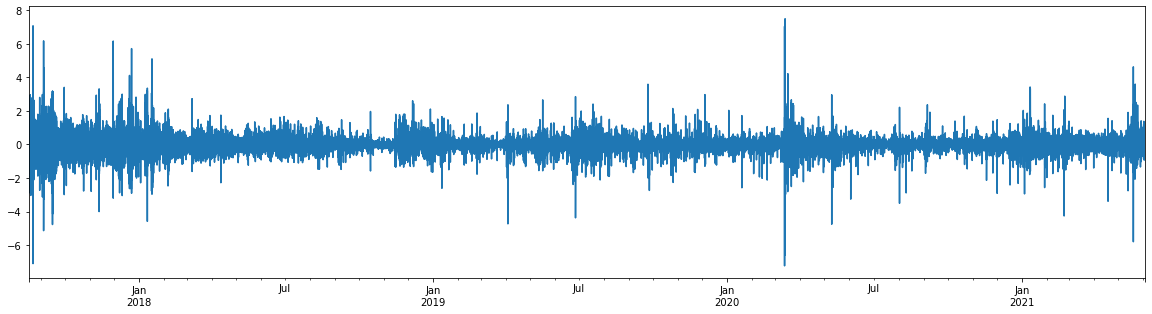

time: 8.1 s (started: 2021-06-11 16:30:31 +00:00)


In [ ]:
df["ROC_1"].plot()

In [ ]:
treshold = 0.15
def get_class_based_on_roc(roc, binary=False):
    if roc > treshold:
        return 0 # buy
    elif roc >= -treshold:
        return 1 # hold
    else: # roc < -treshold
        return 2 # sell

def get_class_based_on_rocs(rocs: list, binary=False):
    if binary == True:
        for roc in rocs:
            if roc < 0:
                return 1  # sell
        for roc in rocs:
            if roc >= 0:
                return 0  # buy
    else:
        for roc in rocs:
            if roc < -treshold:
                return 2  # sell
        for roc in rocs:
            if roc > treshold:
                return 0  # buy
        return 1  # hold

time: 15.5 ms (started: 2021-06-11 16:30:39 +00:00)


In [ ]:
output_class = []
for index, row in df.iterrows():
    rocs = []
    nan_roc = False
    for roc_idx in range(rocs_count):
        rocs.append(row["ROC_{}".format(roc_idx+1)])
        if np.isnan(rocs[-1]):
            nan_roc = True
    if nan_roc:
        continue
    output_class.append(get_class_based_on_rocs(rocs, binary=binary))
for _ in range(rocs_count):
    output_class.append(None)

time: 2min 58s (started: 2021-06-11 16:30:40 +00:00)


In [ ]:
df["output_class"] = output_class

time: 536 ms (started: 2021-06-11 16:33:38 +00:00)


In [ ]:
cols = ["ROC_{}".format(roc_idx+1) for roc_idx in range(1, rocs_count)]
print(cols)
df.drop(columns=cols, inplace=True)

[]
time: 553 ms (started: 2021-06-11 16:33:38 +00:00)


In [ ]:
df.isnull().sum()

close                0
sma5_diff            4
sma8_diff            7
sma13_diff          12
sma21_diff          20
ema5_diff            4
ema8_diff            7
ema13_diff          12
ema21_diff          20
MACD_12_26_9        25
MACDh_12_26_9       33
MACDs_12_26_9       33
RSI_14              14
ROC_1                1
STOCHk_14_3_3       15
STOCHd_14_3_3       17
CCI_14_0.015        13
ATRr_14             13
WILLR_14          1713
AROOND_14           14
AROONU_14           14
AROONOSC_14         14
dema10_diff          9
BBB_5_2.0            4
BBU_5_2.0_diff       4
BBL_5_2.0_diff       4
BBM_5_2.0_diff       4
RVI_14              17
output_class         1
dtype: int64

time: 167 ms (started: 2021-06-11 16:33:39 +00:00)


In [ ]:
df = df.drop(list(df.index[:33]) + list(df.index[-rocs_count:]))

time: 318 ms (started: 2021-06-11 16:33:39 +00:00)


In [ ]:
df.isnull().sum()

close                0
sma5_diff            0
sma8_diff            0
sma13_diff           0
sma21_diff           0
ema5_diff            0
ema8_diff            0
ema13_diff           0
ema21_diff           0
MACD_12_26_9         0
MACDh_12_26_9        0
MACDs_12_26_9        0
RSI_14               0
ROC_1                0
STOCHk_14_3_3        0
STOCHd_14_3_3        0
CCI_14_0.015         0
ATRr_14              0
WILLR_14          1699
AROOND_14            0
AROONU_14            0
AROONOSC_14          0
dema10_diff          0
BBB_5_2.0            0
BBU_5_2.0_diff       0
BBL_5_2.0_diff       0
BBM_5_2.0_diff       0
RVI_14               0
output_class         0
dtype: int64

time: 176 ms (started: 2021-06-11 16:33:39 +00:00)


In [ ]:
final_df = df.fillna(method="ffill")

time: 217 ms (started: 2021-06-11 16:33:40 +00:00)


In [ ]:
final_df

,close,sma5_diff,sma8_diff,sma13_diff,sma21_diff,ema5_diff,ema8_diff,ema13_diff,ema21_diff,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,ROC_1,STOCHk_14_3_3,STOCHd_14_3_3,CCI_14_0.015,ATRr_14,WILLR_14,AROOND_14,AROONU_14,AROONOSC_14,dema10_diff,BBB_5_2.0,BBU_5_2.0_diff,BBL_5_2.0_diff,BBM_5_2.0_diff,RVI_14,output_class
2017-08-17 04:33:00,4267.99,-0.000882,-0.000402,-0.000094,0.000409,-0.000701,-0.000509,-0.000204,0.000135,2.517063,0.710935,1.806128,52.037221,-0.156269,57.813583,64.134419,-1.973131,3.477987,-65.332640,64.285714,78.571429,14.285714,-0.000948,0.670908,-0.004240,0.002475,-0.000882,26.024920,0.0
2017-08-17 04:34:00,4296.63,0.004152,0.005384,0.006029,0.006682,0.003980,0.004791,0.005539,0.006182,4.527372,2.176995,2.350377,73.578620,0.671042,68.018018,68.150843,285.454223,5.420447,0.000000,57.142857,100.000000,42.857143,0.003748,1.013689,-0.000896,0.009199,0.004152,58.444576,0.0
2017-08-17 04:35:00,4300.38,0.004072,0.005260,0.006286,0.007118,0.003232,0.004401,0.005491,0.006408,6.349951,3.199659,3.150292,75.152240,0.087278,78.222453,68.018018,212.079230,5.292232,0.000000,50.000000,100.000000,50.000000,0.002882,1.362926,-0.002715,0.010859,0.004072,75.155465,0.0
2017-08-17 04:36:00,4300.38,0.002876,0.004269,0.005676,0.006687,0.002155,0.003423,0.004707,0.005825,7.705534,3.644193,4.061340,75.152240,0.000000,100.000000,82.080157,156.805529,4.888177,0.000000,42.857143,100.000000,57.142857,0.001626,1.444458,-0.004325,0.010078,0.002876,75.155465,0.0
2017-08-17 04:37:00,4300.38,0.001681,0.003138,0.005066,0.006256,0.001437,0.002663,0.004034,0.005296,8.679787,3.694758,4.985030,75.152240,0.000000,100.000000,92.740818,120.704989,4.516799,0.000000,35.714286,100.000000,64.285714,0.000732,1.319255,-0.004904,0.008266,0.001681,75.155465,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-02 22:54:00,37498.92,0.000513,0.000605,0.001120,0.000859,0.000414,0.000582,0.000580,0.000084,-35.638800,16.538212,-52.177012,47.970966,0.054938,95.348273,87.379139,107.272502,55.716043,0.000000,0.000000,100.000000,100.000000,0.000571,0.240733,-0.000690,0.001716,0.000513,59.603435,0.0
2021-06-02 22:55:00,37514.96,0.000551,0.000852,0.001286,0.001363,0.000561,0.000785,0.000864,0.000465,-29.903408,17.818883,-47.722291,49.983280,0.042775,93.338375,92.782482,142.919178,53.884182,-8.685155,7.142857,100.000000,92.857143,0.000661,0.148965,-0.000194,0.001295,0.000551,63.580643,1.0
2021-06-02 22:56:00,37492.88,-0.000077,0.000252,0.000525,0.000820,-0.000019,0.000153,0.000236,-0.000112,-26.830455,16.713469,-43.543924,47.272832,-0.058857,88.279795,92.322148,102.569537,54.141026,-26.475458,0.000000,100.000000,100.000000,0.000019,0.140590,-0.000780,0.000626,-0.000077,58.044194,0.0
2021-06-02 22:57:00,37549.99,0.001144,0.001477,0.001873,0.002349,0.001002,0.001302,0.001506,0.001281,-19.561328,19.186077,-38.747405,54.192022,0.152322,88.273445,89.963872,157.190046,54.355239,-0.019051,0.000000,100.000000,100.000000,0.001001,0.291973,-0.000314,0.002603,0.001144,62.093463,1.0


time: 147 ms (started: 2021-06-11 16:33:40 +00:00)


In [ ]:
final_df["output_class"].value_counts()   # 0 buy 1 hold 2 sell

0.0    1037019
1.0     958487
Name: output_class, dtype: int64

time: 41.7 ms (started: 2021-06-11 16:33:40 +00:00)


In [ ]:
final_df["output_class"].value_counts(normalize=True)   # 0 buy 1 hold 2 sell

0.0    0.519677
1.0    0.480323
Name: output_class, dtype: float64

time: 47.4 ms (started: 2021-06-11 16:33:40 +00:00)


In [ ]:
final_df.index.name = "open_time"

time: 1.52 ms (started: 2021-06-11 16:33:40 +00:00)


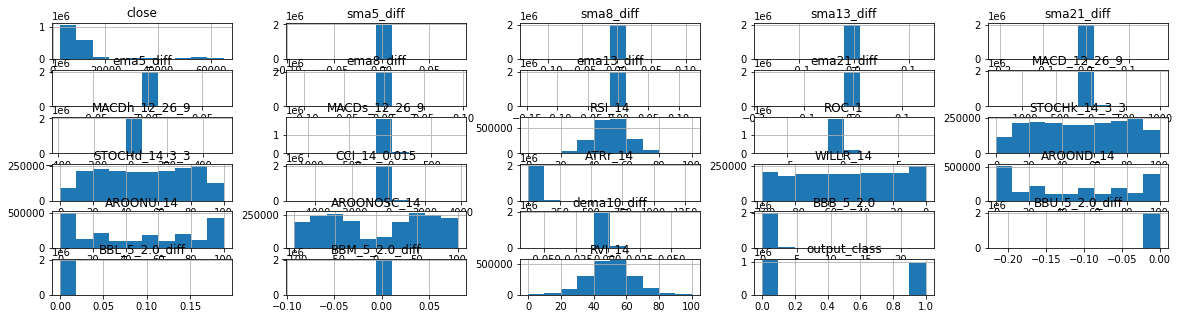

time: 7.33 s (started: 2021-06-11 16:33:40 +00:00)


In [ ]:
final_df.hist();

In [ ]:
final_df[["close"]].to_csv("/drive/My Drive/disertation/minute_close_prices")

time: 6.55 s (started: 2021-06-11 16:34:47 +00:00)


In [ ]:
train_df = final_df.head(288000 // timeframe_minutes)
tune_df = final_df.iloc[835200 // timeframe_minutes: 835200 // timeframe_minutes + 288000 // timeframe_minutes]
test_df = final_df.tail(288000 // timeframe_minutes)


time: 3.49 ms (started: 2021-06-11 15:17:24 +00:00)


In [ ]:
train_df.shape, tune_df.shape, test_df.shape

((4800, 29), (4800, 29), (4800, 29))

time: 5.18 ms (started: 2021-06-11 15:17:24 +00:00)


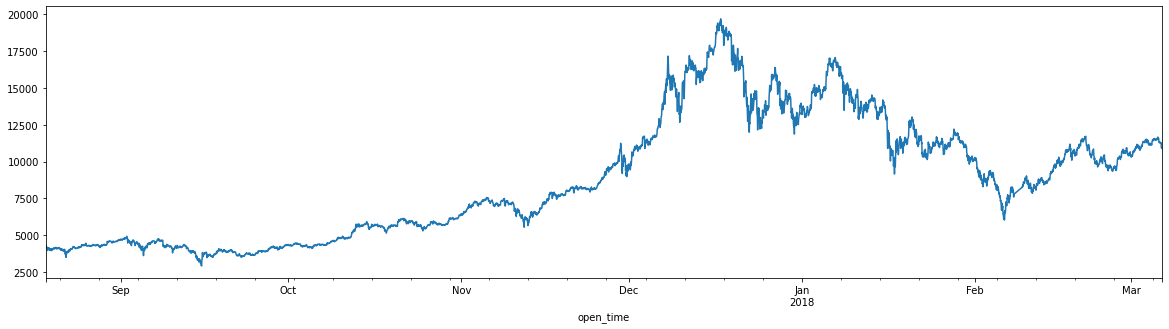

time: 410 ms (started: 2021-06-11 15:17:24 +00:00)


In [ ]:
train_df["close"].plot()

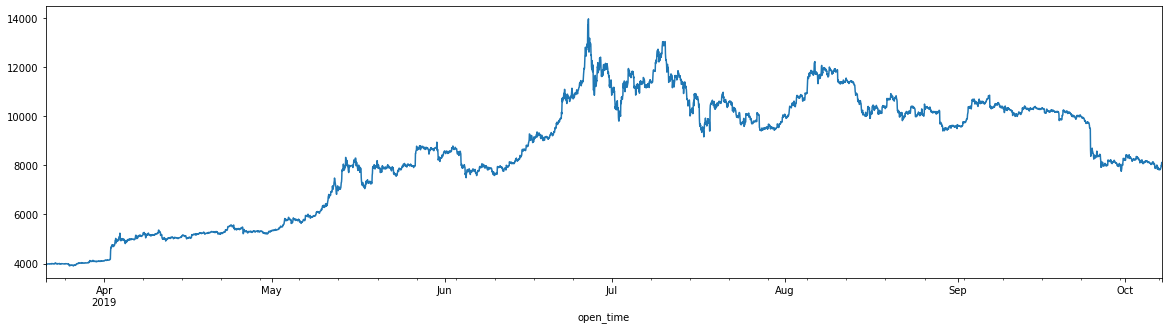

time: 417 ms (started: 2021-06-11 15:17:24 +00:00)


In [ ]:
tune_df["close"].plot()

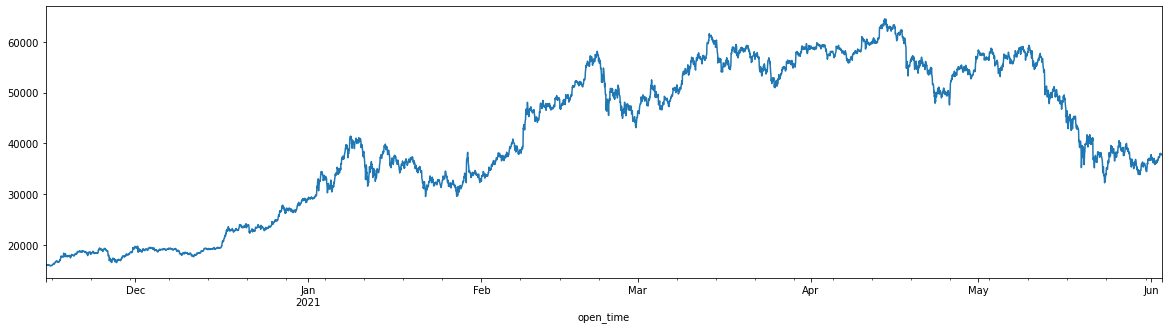

time: 381 ms (started: 2021-06-11 15:17:25 +00:00)


In [ ]:
test_df["close"].plot()

In [ ]:
train_df.to_csv("/drive/My Drive/disertation/train_df_{}_{}_candles_{}_class.csv".format(timeframe, rocs_count, 2 if binary else 3))
tune_df.to_csv("/drive/My Drive/disertation/tune_df_{}_{}_candles_{}_class.csv".format(timeframe, rocs_count, 2 if binary else 3))
test_df.to_csv("/drive/My Drive/disertation/test_df_{}_{}_candles_{}_class.csv".format(timeframe, rocs_count, 2 if binary else 3))

time: 846 ms (started: 2021-06-11 15:17:25 +00:00)
